In [1]:
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt

In [2]:
n=2
m=150
learning_rate = 0.05

In [3]:
torch.manual_seed(3)
X = torch.rand(n,m)

In [4]:
a = 0.45
f1 = (0.2,0.8)
f2 = (0.7,0.2)

In [5]:
d1 = ((X[0,:]-f1[0])**2 + (X[1,:]-f1[1])**2)**0.5
d2 = ((X[0,:]-f2[0])**2 + (X[1,:]-f2[1])**2)**0.5
Y = (d1 + d2 <= 2*a).float()

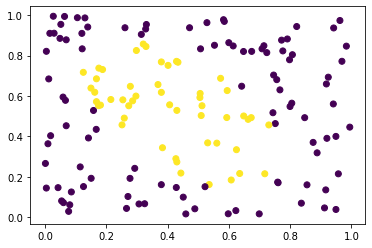

In [6]:
plt.scatter(X[0,:],X[1,:],c=Y)

In [7]:
class Model:
    def __init__(self,shape,learning_rate):
        self.w1 = torch.rand((7,shape),requires_grad=True)
        self.b1 = torch.zeros((7,1),requires_grad=True)
        self.w2 = torch.rand((1,7),requires_grad=True)
        self.b2 = torch.zeros((1,1),requires_grad=True)
        self.learning_rate = learning_rate
    
    def forward_pass(self,X):
        self.Z1 = torch.matmul(self.w1,X) + self.b1 #3xm
        self.A1 = self.reluActivation(self.Z1)
        
        self.Z2 = torch.mm(self.w2,self.A1) + self.b2 #1xm
        self.A2 = self.sigmoidActivation(self.Z2)
        return self.A2
    
    def compute_cost(self,Y):
        return -( torch.matmul(Y,torch.log(self.A2).T) + torch.matmul(1-Y,torch.log(1-self.A2).T))/Y.shape[0]
    
    def back_pass(self):      
        with torch.no_grad():
            self.w2 = self.w2 - self.learning_rate*self.w2.grad
            self.b2 = self.b2 - self.learning_rate*self.b2.grad
            self.w1 = self.w1 - self.learning_rate*self.w1.grad
            self.b1 = self.b1 - self.learning_rate*self.b1.grad
            
        self.w1.requires_grad=True
        self.b1.requires_grad=True
        self.w2.requires_grad=True
        self.b2.requires_grad=True
            
        #self.w1.grad.zero_()
        #self.b1.grad.zero_()
        #self.w2.grad.zero_()
        #self.b2.grad.zero_()
        
    def predict(self, X):
        return self.forward_pass(X)
    
    def sigmoidActivation(self,Z):
        return 1/(1+torch.exp(-Z))
    
    def reluActivation(self,Z):
        return torch.maximum(torch.Tensor([0]),Z)

In [8]:
costs=[]

In [9]:
splitter = Model(n,learning_rate)

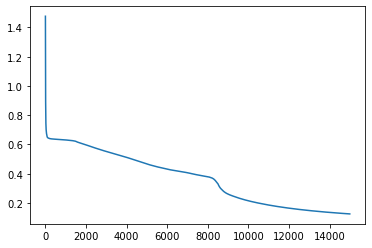

In [10]:
for i in range(15000):
    splitter.forward_pass(X)
    cost = splitter.compute_cost(Y)
    costs.append(cost[0])
    cost.retain_grad()
    cost.backward()
    splitter.back_pass()
plt.plot(costs)

In [11]:
out = splitter.predict(X)>0.5

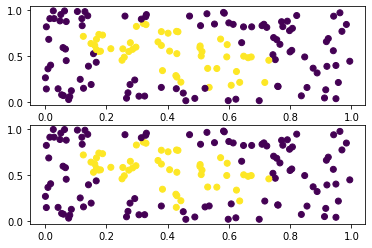

In [12]:
f,a = plt.subplots(2)
a[0].scatter(X[0,:], X[1,:],c=Y)
a[1].scatter(X[0,:], X[1,:],c=out)